In [ ]:
!nvidia-smi

Sat Jul 15 22:20:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics <= 8.0.20
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.7/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:01<00:00, 17.2MB/s]
Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients

100% 104k/104k [00:00<00:00, 47.2MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 125.0ms
Speed: 12.9ms preprocess, 125.0ms inference, 18.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict


/content


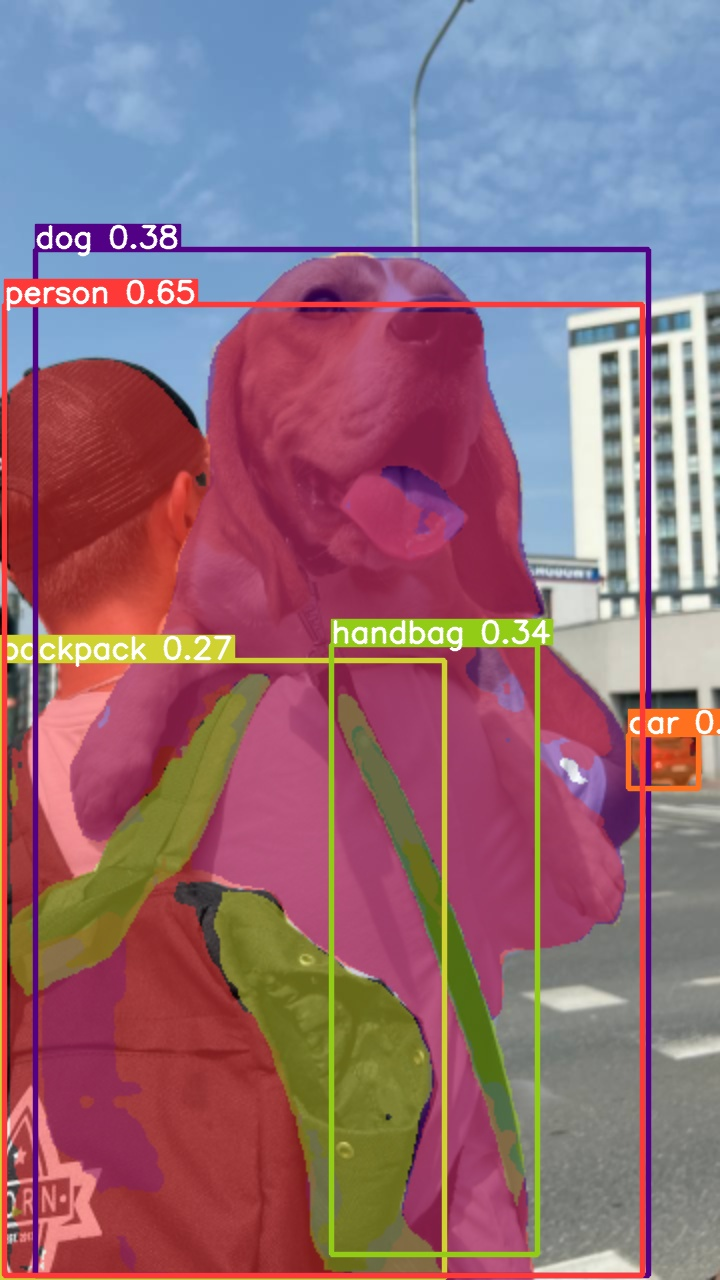

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GV4KxNTY3qzci19mq2xO")
project = rf.workspace("ece-499-project-vbfpq").project("spectral-labs-marine-dataset-segmented")
dataset = project.version(5).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.135, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Red,Green,Yellow-1 in yolov8:: 100%|██████████| 17736/17736 [00:04<00:00, 3650.79it/s]


In [ ]:
%cd {HOME}
!yolo task= detect \
mode=train \
model=yolov8n.pt \
data={dataset.location}/data.yaml \
epochs=25 \
imgsz=640

/content
Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Red,Green,Yellow-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch7050.jpg
events.out.tfevents.1689460613.e2b1772f0d6e.7732.0  train_batch7051.jpg
F1_curve.png					    train_batch7052.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


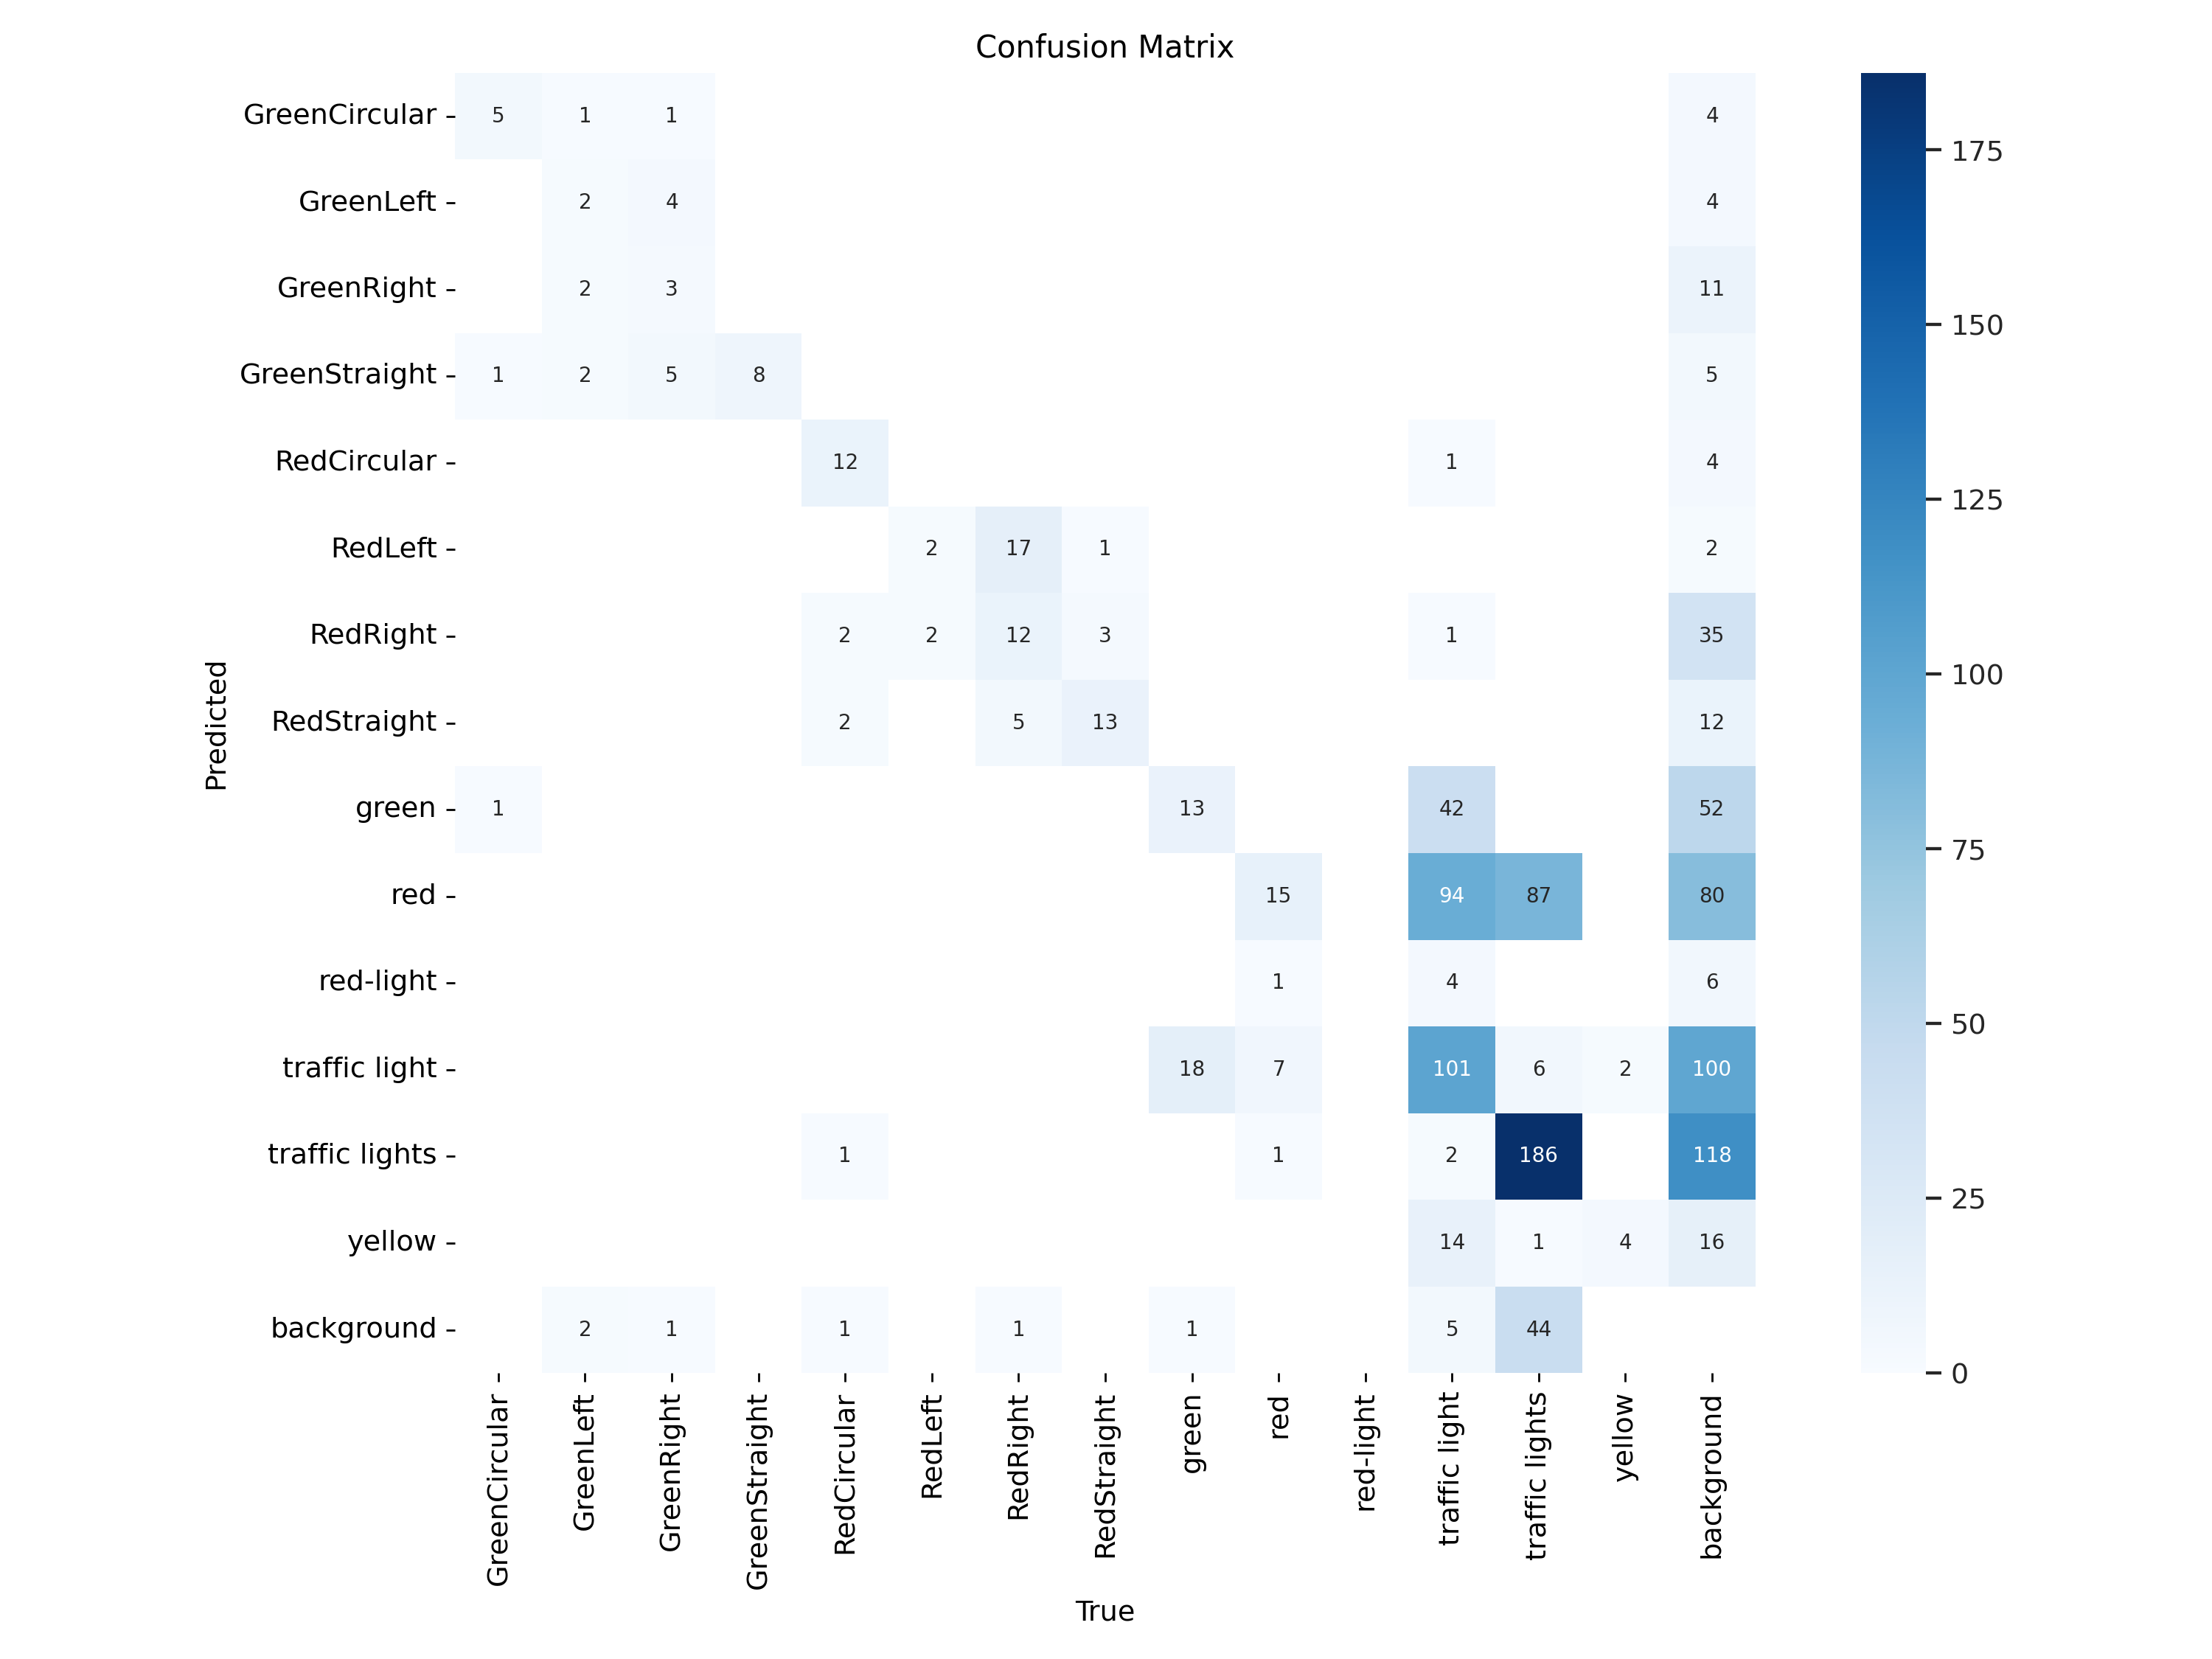

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width =600)

/content


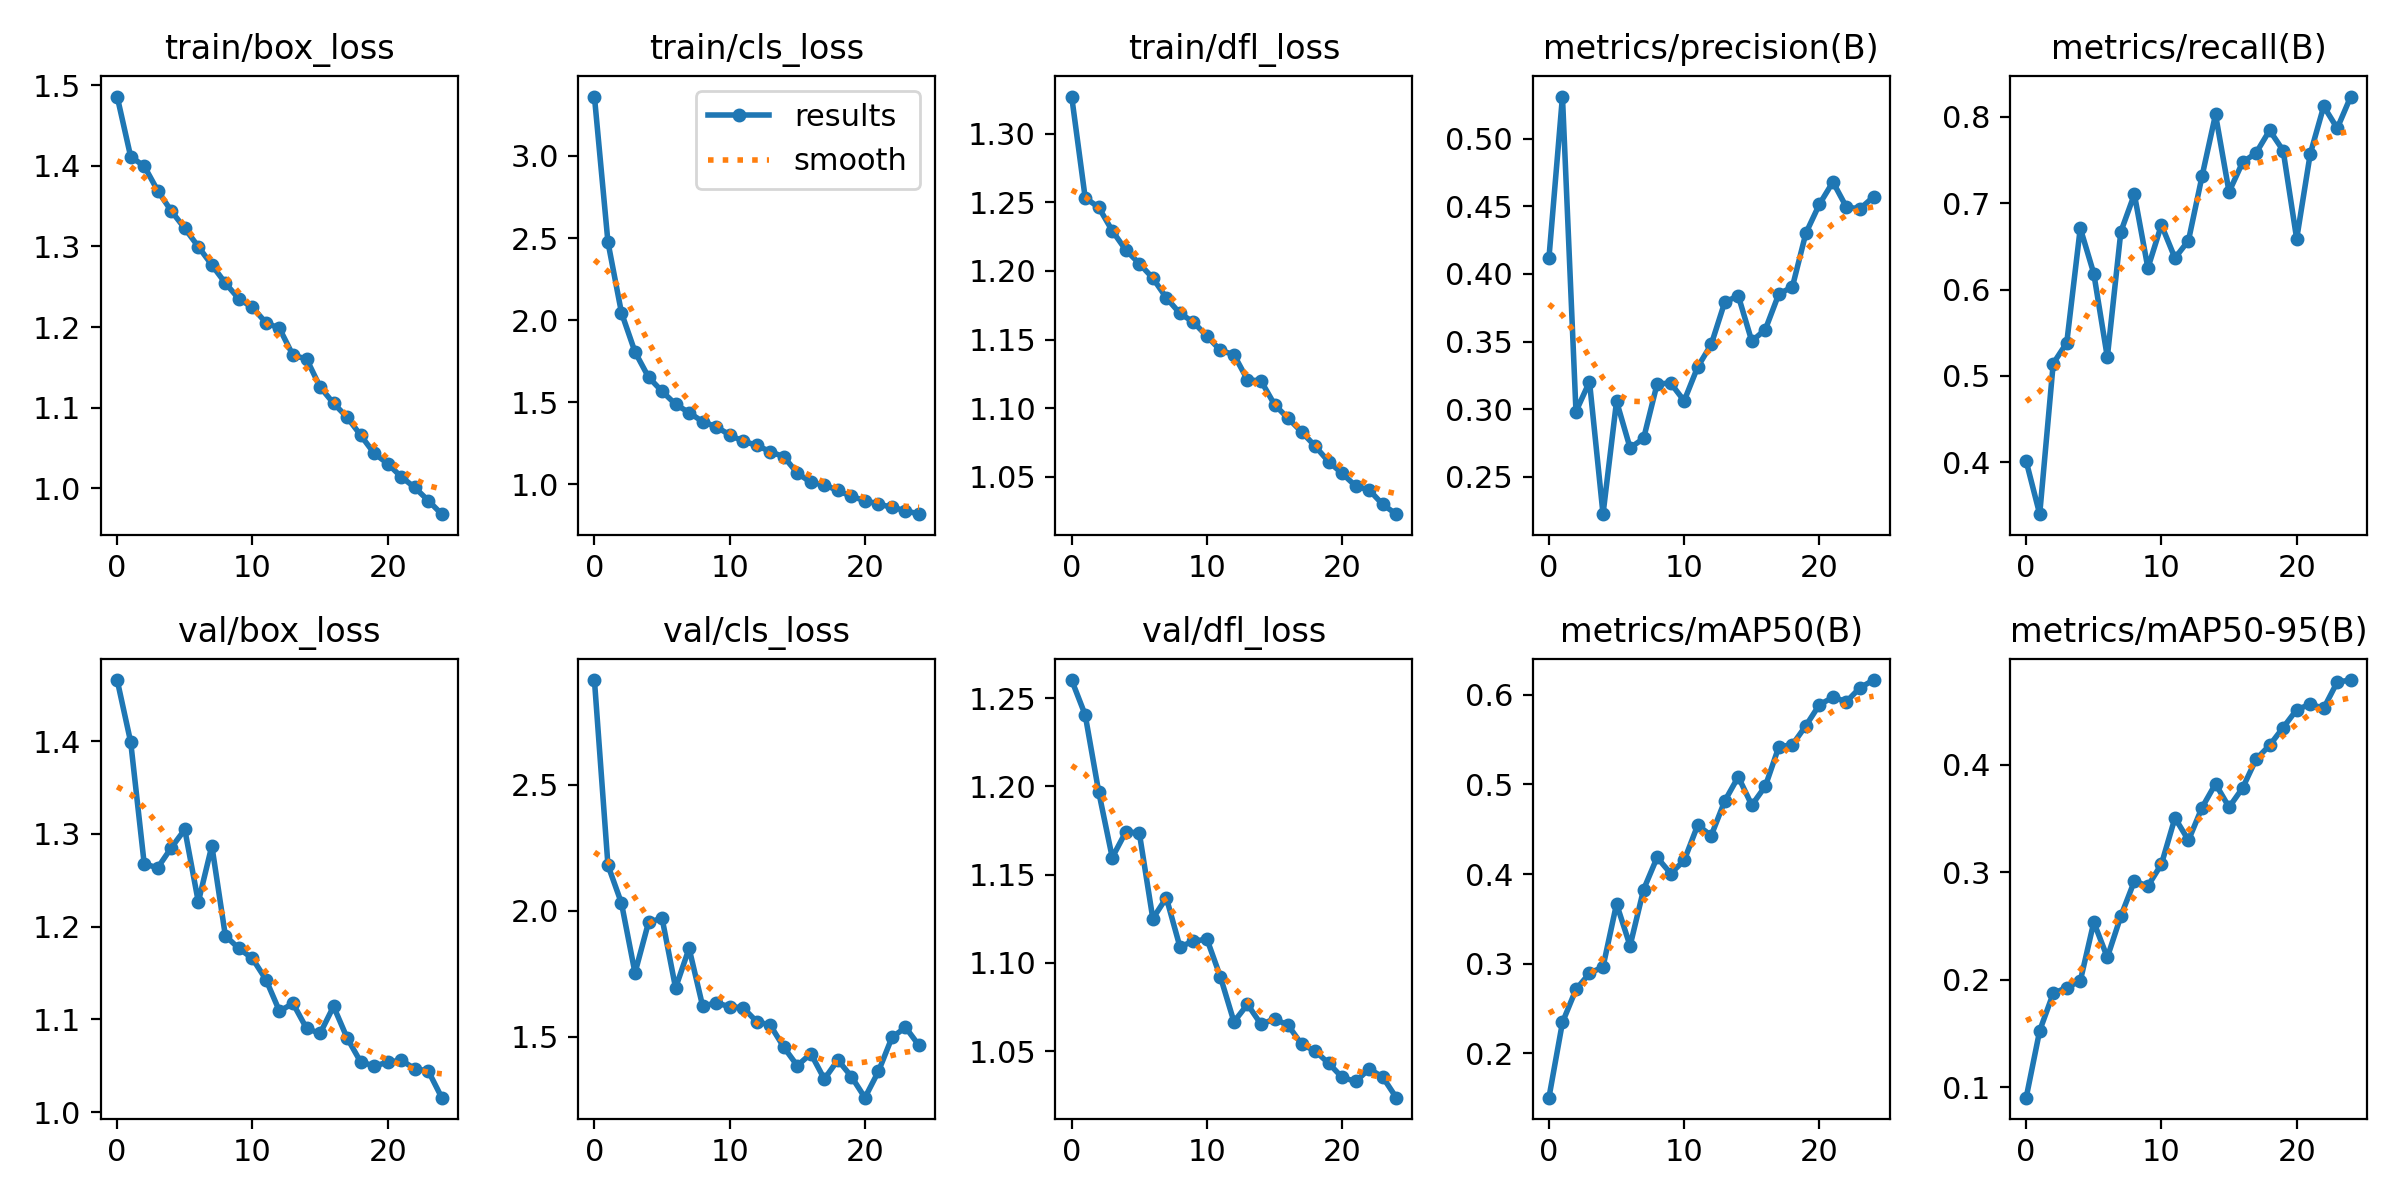

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


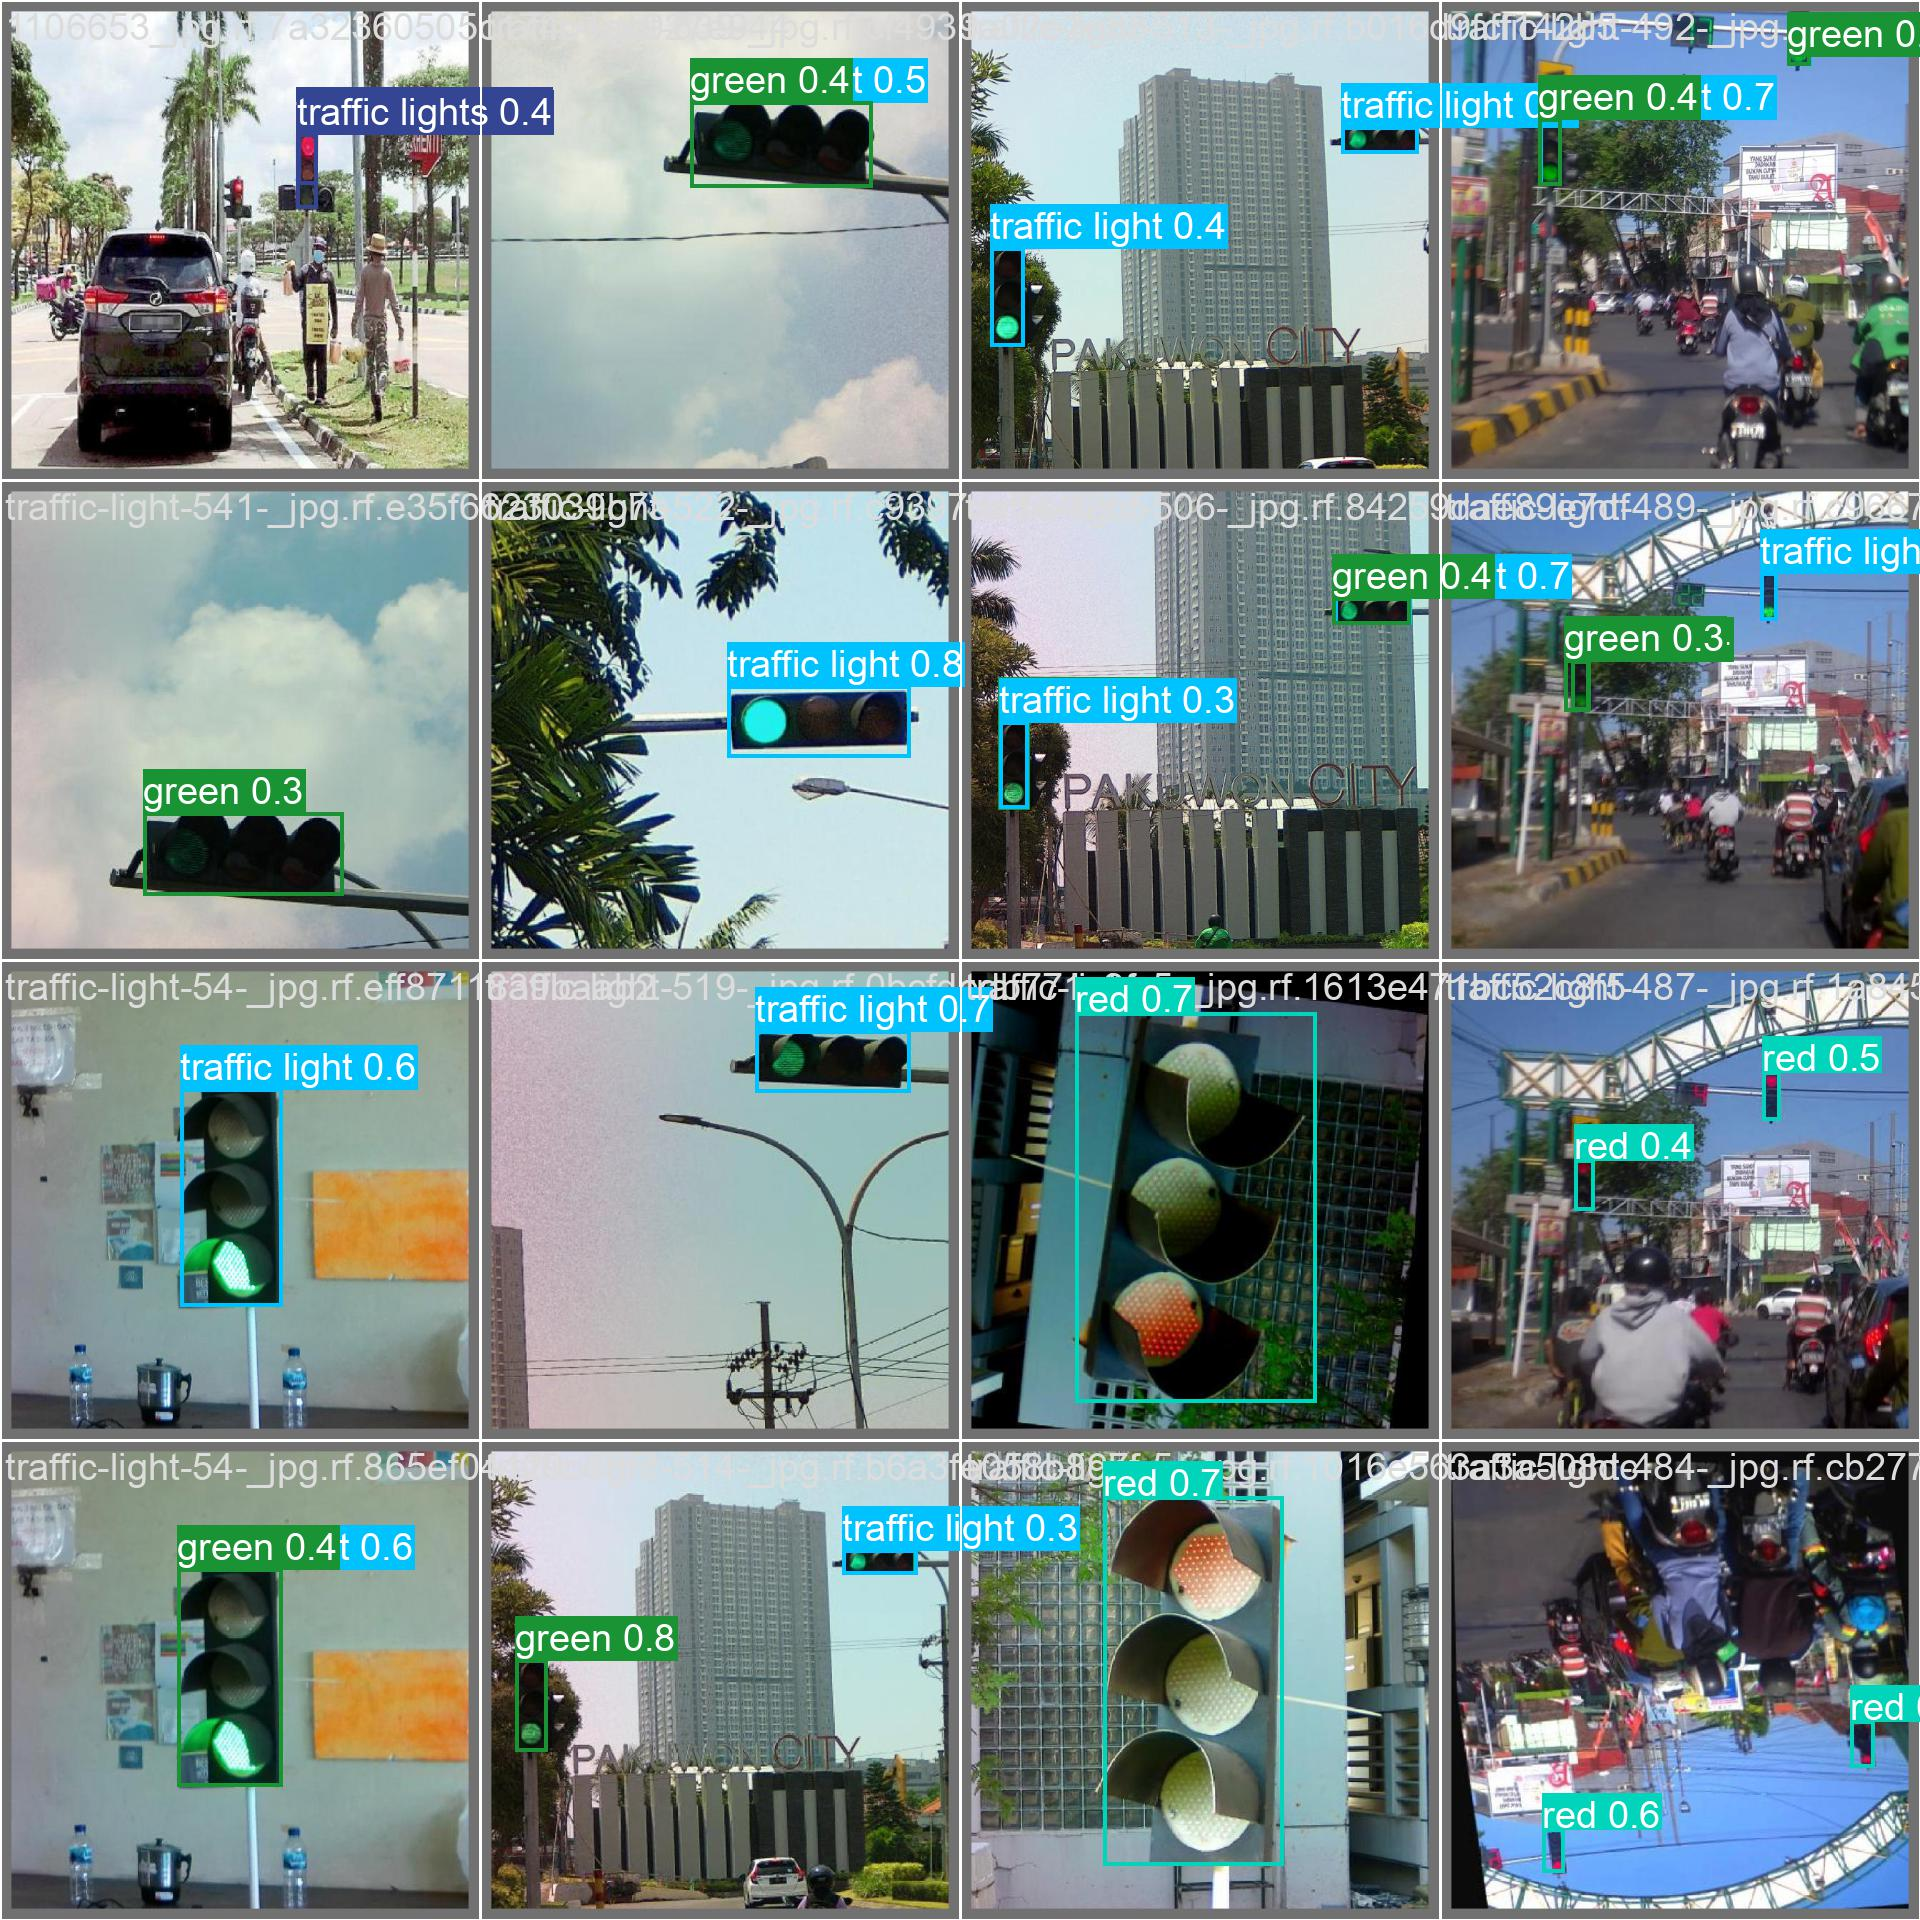

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

In [ ]:
%cd {HOME}
!yolo task=detect \
mode=val \
model={HOME}/runs/detect/train/weights/best.pt \
data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients
val: Scanning /content/Red,Green,Yellow-1/valid/labels.cache... 497 images, 0 backgrounds, 0 corrupt: 100% 497/497 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 32/32 [00:09<00:00,  3.50it/s]
                   all        497        762      0.457      0.823      0.615      0.481
         GreenCircular        497          7       0.62          1      0.964      0.698
             GreenLeft        497          9       0.33      0.333      0.263      0.206
            GreenRight        497         14      0.673      0.786       0.72      0.564
         GreenStraight        497          8      0.375          1      0.995      0.847
           RedCircular        497         18      0.815      0.778      0.872      0.694
               RedLeft        497          4

In [ ]:
%cd {HOME}
!yolo task=detect \
mode=predict \
model={HOME}/runs/detect/train/weights/best.pt \
conf=0.25 \
source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients

image 1/848 /content/Red,Green,Yellow-1/test/images/1677427458471_jpg.rf.93aca789e18ce27157db7b9e0b4ed05c.jpg: 640x640 2 RedCirculars, 1 RedRight, 8.8ms
image 2/848 /content/Red,Green,Yellow-1/test/images/1677427458619_jpg.rf.aa3c0175768985a17d112b92db978b47.jpg: 640x640 1 RedRight, 7.3ms
image 3/848 /content/Red,Green,Yellow-1/test/images/1677427458894_jpg.rf.a193eb1bf62d2935b8cb84f2c67e40c8.jpg: 640x640 1 GreenStraight, 2 RedRights, 1 RedStraight, 7.3ms
image 4/848 /content/Red,Green,Yellow-1/test/images/1677427459104_jpg.rf.81a08305b80ed9df90ce4fca5eb4b900.jpg: 640x640 1 RedRight, 1 RedStraight, 7.3ms
image 5/848 /content/Red,Green,Yellow-1/test/images/1677427459378_jpg.rf.a0f2b97fe3dc574ea938288f4be36a6e.jpg: 640x640 1 RedRight, 1 RedStraight, 7.3ms
image 6/848 /content/Red,Green,Yellow-1/test/images/1677427459422_jpg.r

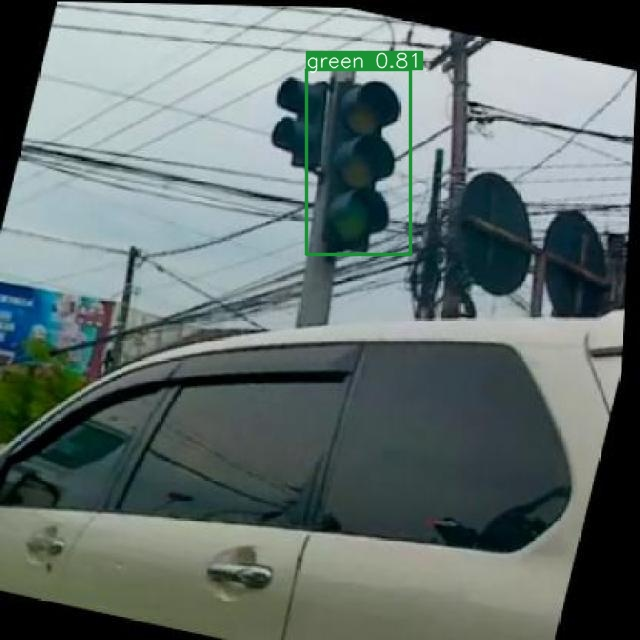

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:1]:
  display(Image(filename=image_path, width = 600))
  print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect \
mode=predict \
model={HOME}/runs/detect/train/weights/best.pt \
conf=0.25 \
source=/content/30.png

/content
Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients

image 1/1 /content/30.png: 384x640 1 GreenCircular, 1 green, 2 traffic lights, 57.2ms
Speed: 2.3ms preprocess, 57.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
